<a href="https://colab.research.google.com/github/sarathpanat/Pneumonia-detection/blob/main/pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sarathpanat","key":"7dc248f227e30f0b566e200957ef7927"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list -s 'Chest X-Ray Images (Pneumonia)'

ref                                                 title                                              size  lastUpdated          downloadCount  
--------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
paultimothymooney/chest-xray-pneumonia              Chest X-Ray Images (Pneumonia)                      2GB  2018-03-24 19:41:59          88302  
praveengovi/coronahack-chest-xraydataset            CoronaHack -Chest X-Ray-Dataset                     1GB  2020-03-20 01:26:40           7280  
nih-chest-xrays/data                                NIH Chest X-rays                                   42GB  2018-02-21 20:52:23          41839  
tawsifurrahman/covid19-radiography-database         COVID-19 Radiography Database                       1GB  2020-03-28 23:36:00          10304  
prashant268/chest-xray-covid19-pneumonia            Chest X-ray (Covid-19 & Pneumonia)                  2GB  2020-09-17 12:0

In [8]:
!kaggle datasets download -d "paultimothymooney/chest-xray-pneumonia"

 99% 2.28G/2.29G [00:30<00:00, 57.7MB/s]
100% 2.29G/2.29G [00:30<00:00, 81.5MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

In [2]:
import numpy as np
from glob import glob

train_p = np.array(glob("/content/chest_xray/train/PNEUMONIA/*"))
train_n = np.array(glob("/content/chest_xray/train/NORMAL/*"))
valid_p = np.array(glob("/content/chest_xray/val/PNEUMONIA/*"))
valid_n = np.array(glob("/content/chest_xray/val/NORMAL/*"))
test_p = np.array(glob("/content/chest_xray/test/PNEUMONIA/*"))
test_n = np.array(glob("/content/chest_xray/test/NORMAL/*"))

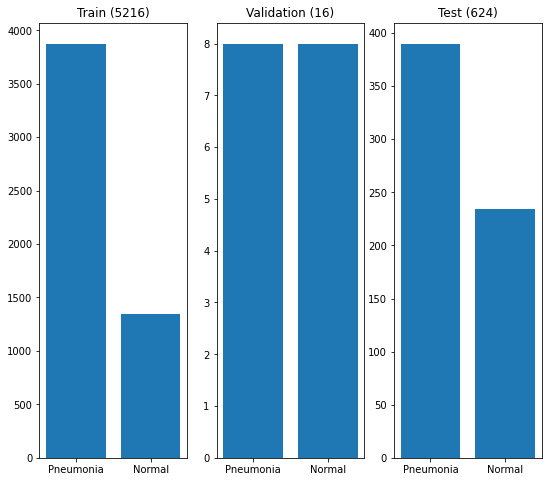

In [43]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(9,8))

ax1.bar(['Pneumonia','Normal'],[len(train_p),len(train_n)])
ax1.set_title('Train ('+str(len(train_p)+len(train_n))+')')
ax2.bar(['Pneumonia','Normal'],[len(valid_p),len(valid_n)])
ax2.set_title('Validation ('+str(len(valid_p)+len(valid_n))+')')
ax3.bar(['Pneumonia','Normal'],[len(test_p),len(test_n)])
ax3.set_title('Test ('+str(len(test_p)+len(test_n))+')')
plt.show()


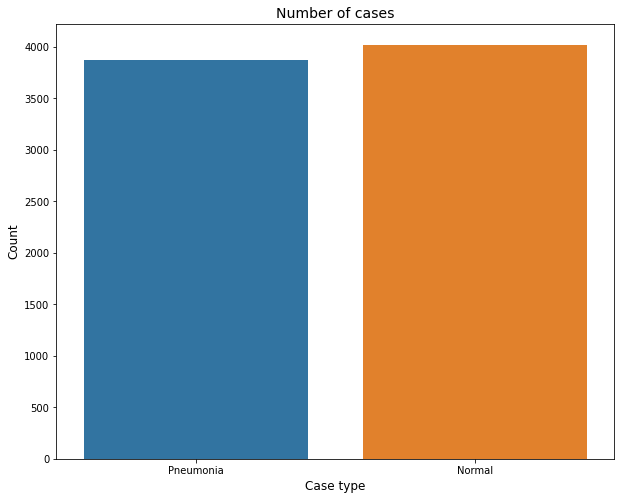

In [11]:
import seaborn as sns

train_n = np.array(glob("/content/chest_xray/train/NORMAL/*")*3)

plt.figure(figsize=(10,8))
sns.barplot(x=['Pneumonia','Normal'], y= [len(train_p),len(train_n)])
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

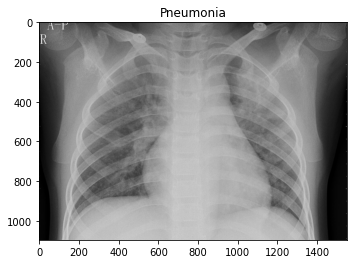

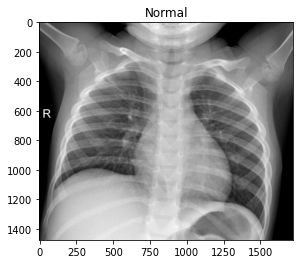

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(train_p[0])
plt.imshow(img)
plt.title('Pneumonia')
plt.show()

img = cv2.imread(train_n[0])
plt.imshow(img)
plt.title('Normal')
plt.show()

In [3]:
import cv2
import keras
from keras.utils import to_categorical

train_data=[]
train_labels=[]

for img in train_p:
  img = cv2.imread(str(img))
  img = cv2.resize(img, (224,224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype(np.float32)/255.0
  label = 1
  label = np.float32(label)
  train_data.append(img)
  train_labels.append(label)

for img in train_n:
  img = cv2.imread(str(img))
  img = cv2.resize(img, (224,224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype(np.float32)/255.0
  label = 0
  label = np.float32(label)
  train_data.append(img)
  train_labels.append(label)

train_data = np.array(train_data)
train_labels = np.array(train_labels)

print(train_data.shape)
print(train_labels.shape)

(7898, 224, 224, 3)
(7898,)


In [ ]:
# Get few samples for both the classes
pneumonia_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [3]:
import cv2
import keras
from keras.utils import to_categorical

valid_data=[]
valid_labels=[]

for img in valid_p:
  img = cv2.imread(str(img))
  img = cv2.resize(img, (224,224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype(np.float32)/255.0
  label=1
  label = np.float32(label)
  valid_data.append(img)
  valid_labels.append(label)

for img in valid_n:
  img = cv2.imread(str(img))
  img = cv2.resize(img, (224,224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype(np.float32)/255.0
  label = 0
  label = np.float32(label)
  valid_data.append(img)
  valid_labels.append(label)
  

valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)

print(valid_data.shape)
print(valid_labels.shape)

(16, 224, 224, 3)
(16, 2)


In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_aug = ImageDataGenerator( horizontal_flip = False,
                                      vertical_flip = False, 
                                      height_shift_range = 0.2,
                                      width_shift_range = 0.2, 
                                      rotation_range = 30, 
                                      shear_range = 0.2,
                                      zoom_range=0.2)
train_gen = train_aug.flow(train_data,train_labels,batch_size=32)

In [17]:
from keras.layers import Dense, Flatten, Dropout
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model

vgg = VGG16(include_top=True, weights='imagenet')
transfer_layer = vgg.get_layer('block5_pool')
vgg = Model(inputs = vgg.input, outputs = transfer_layer.output)

for layer in vgg.layers:
    layer.trainable = False


vgg_model = Sequential()
vgg_model.add(vgg)
vgg_model.add(Flatten())
vgg_model.add(Dense(128, activation = 'relu'))
vgg_model.add(Dropout(0.2))
vgg_model.add(Dense(64, activation = 'relu'))
vgg_model.add(Dropout(0.2))
vgg_model.add(Dense(32, activation = 'relu'))
vgg_model.add(Dropout(0.2))
vgg_model.add(Dense(1, activation = 'sigmoid'))

vgg_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_7 (Functional)    (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)               

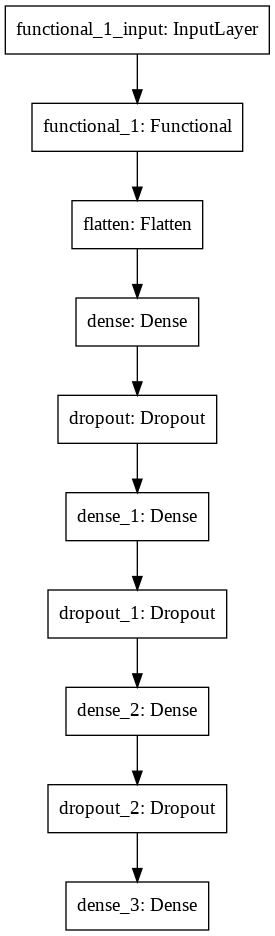

In [15]:
from keras.utils import plot_model
plot_model(vgg_model)

In [15]:
from keras import backend as K
from keras.optimizers import Adam

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

metrics = [f1_m, precision_m, recall_m]

opt = Adam(lr=1e-4, decay=1e-5)

vgg_model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = metrics)

In [9]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight_path="weights-improvement.hdf5"

checkpoint = ModelCheckpoint(weight_path, 
                              monitor= 'val_f1_m', 
                              verbose=1, 
                              save_best_only=True, 
                              mode= 'max', 
                              save_weights_only = True)

early = EarlyStopping(monitor= 'val_f1_m', 
                       mode= 'max', 
                       patience=10)

callbacks_list = [checkpoint, early]

In [18]:
history = vgg_model.fit(train_gen,epochs=100,validation_data=(valid_data, valid_labels),callbacks = callbacks_list, shuffle=True)

Epoch 1/100
247/247 [==============================] - ETA: 0s - loss: 0.2387 - f1_m: 0.9094 - precision_m: 0.9338 - recall_m: 0.8932
Epoch 00001: val_f1_m improved from -inf to 0.82353, saving model to weights-improvement.hdf5
247/247 [==============================] - 100s 406ms/step - loss: 0.2387 - f1_m: 0.9094 - precision_m: 0.9338 - recall_m: 0.8932 - val_loss: 0.2994 - val_f1_m: 0.8235 - val_precision_m: 0.7778 - val_recall_m: 0.8750
Epoch 2/100
247/247 [==============================] - ETA: 0s - loss: 0.1979 - f1_m: 0.9273 - precision_m: 0.9476 - recall_m: 0.9132
Epoch 00002: val_f1_m did not improve from 0.82353
247/247 [==============================] - 92s 371ms/step - loss: 0.1979 - f1_m: 0.9273 - precision_m: 0.9476 - recall_m: 0.9132 - val_loss: 0.2374 - val_f1_m: 0.8235 - val_precision_m: 0.7778 - val_recall_m: 0.8750
Epoch 3/100
247/247 [==============================] - ETA: 0s - loss: 0.1907 - f1_m: 0.9248 - precision_m: 0.9439 - recall_m: 0.9130
Epoch 00003: val_f1_

In [50]:
import cv2
import keras
from keras.utils import to_categorical

test_data=[]
test_labels=[]

for img in test_p:
  img = cv2.imread(str(img))
  img = cv2.resize(img, (224,224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype(np.float32)/255.0
  label=1
  label = np.float32(label)
  test_data.append(img)
  test_labels.append(label)

for img in test_n:
  img = cv2.imread(str(img))
  img = cv2.resize(img, (224,224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype(np.float32)/255.0
  label = 0
  label = np.float32(label)
  test_data.append(img)
  test_labels.append(label)
  

test_data = np.array(test_data)
test_labels = np.array(test_labels)

print(test_data.shape)
print(test_labels.shape)

(468, 224, 224, 3)
(468,)


In [47]:
np.random.shuffle(test_p)
test_p = test_p[156:]

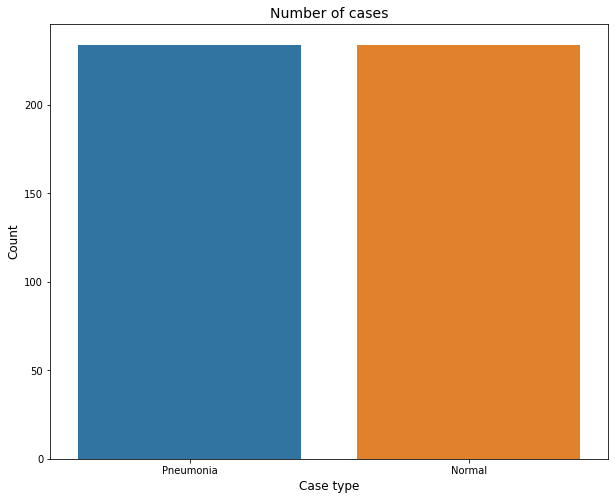

In [55]:
# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=['Pneumonia','Normal'], y= [len(test_p),len(test_n)])
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
#plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [53]:
vgg_model.load_weights(weight_path)
pred = vgg_model.predict(test_data, batch_size = 32, verbose = True)

15/15 [==============================] - 2s 122ms/step


In [54]:
pred=pred.round()
pred=pred.reshape(-1)

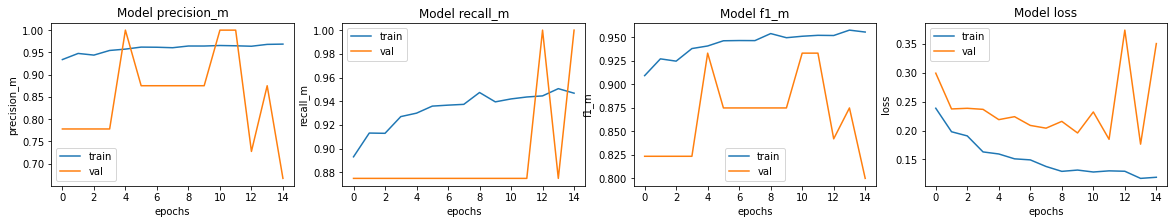

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision_m', 'recall_m', 'f1_m', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

[Text(0, 0.5, 'PNEUMONIA'), Text(0, 1.5, 'NORMAL')]

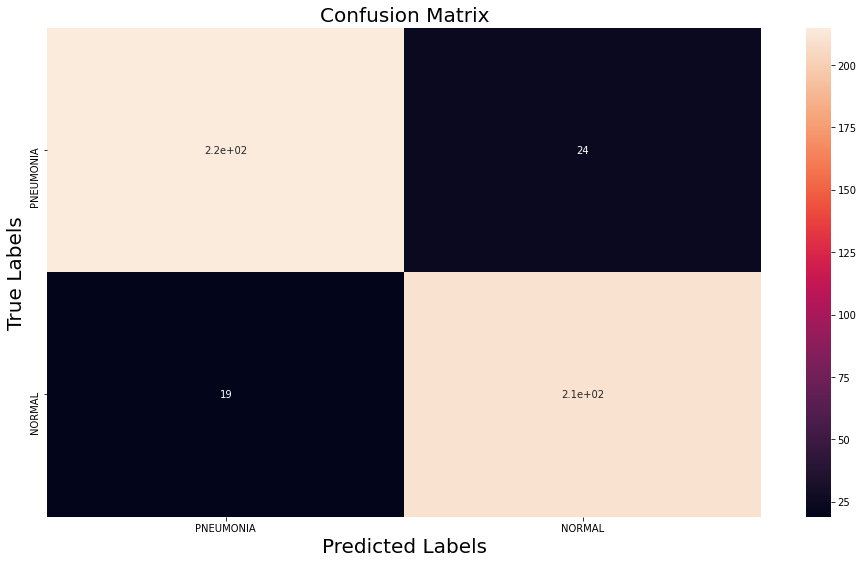

In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['PNEUMONIA', 'NORMAL']
tn, fp, fn, tp = confusion_matrix(pred, test_labels).ravel()
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [70]:
accuracy = (tp+tn)/(tp+tn+fn+fp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*((precision*recall)/(precision+recall))

print('accuracy score on test data:',accuracy)
print('precision score on test data:',precision)
print('recall score on test data:',recall)
print('f1_score on test data:',f1_score)

accuracy score on test data: 0.9081196581196581
precision score on test data: 0.8974358974358975
recall score on test data: 0.9170305676855895
f1_score on test data: 0.9071274298056157
